In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [2]:
# import dataset and shuffle data
df = pd.read_csv('dataset.csv')
df = df.sample(frac=1).reset_index(drop=True)
df


,1 x 1,1 x 2,1 x 3,1 x 4,1 x 5,1 x 6,1 x 7,1 x 8,1 x 9,1 x 10,...,64 x 25,64 x 26,64 x 27,64 x 28,64 x 29,64 x 30,64 x 31,64 x 32,Subject,Position
0,0.068924,0.113716,0.271411,0.649880,1.246211,1.845172,2.152503,1.977401,1.378493,0.698617,...,0.000327,0.000044,3.699127e-06,0.000000,0.000000,0.000000,0.000000,0.000000,3,1.0
1,0.179178,0.230919,0.323028,0.438528,0.553963,0.696448,0.904274,1.060291,1.002484,0.806849,...,1.589858,0.609444,1.669075e-01,0.032724,0.004554,0.000413,0.000019,0.000000,4,0.0
2,0.105551,0.097998,0.081072,0.074048,0.102611,0.169748,0.240494,0.257850,0.202271,0.117013,...,0.000060,0.000007,6.185883e-07,0.000000,0.000000,0.000000,0.000000,0.000000,12,0.0
3,0.894570,0.604777,0.278189,0.100905,0.095797,0.267929,0.615272,0.969800,1.043817,0.775154,...,1.673798,0.377977,6.009904e-02,0.006444,0.000383,0.000003,0.000000,0.000000,8,0.0
4,14.006924,48.265525,119.938675,208.789686,274.751629,298.025075,291.072709,273.101267,254.046135,235.882969,...,67.679504,67.464083,6.690381e+01,64.420812,56.840724,41.912681,23.467269,10.723250,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,3.912681,4.038842,3.900785,3.635342,4.745207,9.261911,17.453151,26.354504,31.681130,31.228623,...,0.312032,0.097052,2.017678e-02,0.002780,0.000249,0.000004,0.000000,0.000000,1,0.0
2671,0.201887,0.411352,0.733622,0.929320,0.846529,0.664275,0.685317,1.007911,1.507337,2.008048,...,0.114108,0.093906,6.337791e-02,0.030530,0.009926,0.002133,0.000299,0.000026,6,0.0
2672,0.100158,0.217660,0.530349,1.174858,2.273526,3.775006,5.280424,6.070771,5.632438,4.247257,...,0.164347,0.125762,7.996186e-02,0.053075,0.048773,0.061812,0.092153,0.122681,5,2.0
2673,0.027655,0.053126,0.091467,0.132068,0.198279,0.353140,0.626800,0.920712,1.077154,1.135573,...,0.134239,0.041080,9.280700e-03,0.001466,0.000158,0.000008,0.000000,0.000000,5,0.0


In [3]:
# Split dataset in train and val
num_col = len(df.columns)
train_split = 2000
test_split = 2500

train_data = df.iloc[0:train_split, 0:num_col-2]
val_data = df.iloc[train_split:test_split, 0:num_col-2]

train_labels_subject = df.iloc[0:train_split, num_col-2:num_col-1]
val_labels_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
train_labels_position = df.iloc[0:train_split, num_col-1:num_col]
val_labels_position = df.iloc[train_split:test_split, num_col-1:num_col]

test_data = df.iloc[test_split:,:num_col-2]
result = df.iloc[test_split:, num_col-3:num_col]


In [4]:
tf_train_subject = tf.data.Dataset.from_tensor_slices((train_data.values, train_labels_subject.values))
tf_val_subject = tf.data.Dataset.from_tensor_slices((val_data.values, val_labels_subject.values))

print(tf_train_subject)
print(tf_val_subject)

tf_train_position = tf.data.Dataset.from_tensor_slices((train_data.values, train_labels_position.values))
tf_val_position = tf.data.Dataset.from_tensor_slices((val_data.values, val_labels_position.values))

print(tf_train_position)
print(tf_val_position)


<TensorSliceDataset shapes: ((2048,), (1,)), types: (tf.float64, tf.int64)>
<TensorSliceDataset shapes: ((2048,), (1,)), types: (tf.float64, tf.int64)>
<TensorSliceDataset shapes: ((2048,), (1,)), types: (tf.float64, tf.float64)>
<TensorSliceDataset shapes: ((2048,), (1,)), types: (tf.float64, tf.float64)>


/usr/local/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


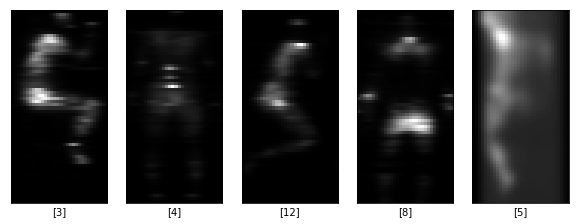

In [5]:
plt.figure(figsize=(10,5))
i = 0

for pressure_map, label in tf_train_subject.take(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(pressure_map.numpy().reshape((64, 32)), cmap='gray')
    plt.xlabel(label.numpy())
    
    # TODO: add labelalso for position
    
    i = i + 1


In [6]:
def preprocess_map(pressure_map, label):
    pressure_map = tf.reshape(pressure_map, [64, 32, 1])
    pressure_map = tf.cast(pressure_map, tf.float32) / 500.
    
    return pressure_map, label

tf_train_subject = tf_train_subject.map(preprocess_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)
tf_val_subject = tf_val_subject.map(preprocess_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)

print(tf_train_subject)
print(tf_val_subject)

tf_train_position = tf_train_position.map(preprocess_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)
tf_val_position = tf_val_position.map(preprocess_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)

print(tf_train_position)
print(tf_val_position)

<ParallelMapDataset shapes: ((64, 32, 1), (1,)), types: (tf.float32, tf.int64)>
<ParallelMapDataset shapes: ((64, 32, 1), (1,)), types: (tf.float32, tf.int64)>
<ParallelMapDataset shapes: ((64, 32, 1), (1,)), types: (tf.float32, tf.float64)>
<ParallelMapDataset shapes: ((64, 32, 1), (1,)), types: (tf.float32, tf.float64)>


In [7]:
def pipeline(tf_data):
    tf_data = tf_data.shuffle(100)
    tf_data = tf_data.batch(1)
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    
    return tf_data

tf_train_subject = pipeline(tf_train_subject)
tf_val_subject = pipeline(tf_val_subject)

print(tf_train_subject)
print(tf_val_subject)

tf_train_position = pipeline(tf_train_position)
tf_val_position = pipeline(tf_val_position)

print(tf_train_position)
print(tf_val_position)


<PrefetchDataset shapes: ((None, 64, 32, 1), (None, 1)), types: (tf.float32, tf.int64)>
<PrefetchDataset shapes: ((None, 64, 32, 1), (None, 1)), types: (tf.float32, tf.int64)>
<PrefetchDataset shapes: ((None, 64, 32, 1), (None, 1)), types: (tf.float32, tf.float64)>
<PrefetchDataset shapes: ((None, 64, 32, 1), (None, 1)), types: (tf.float32, tf.float64)>


In [24]:
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 32, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Conv2D(16, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    
    Dropout(0.4),
    Dense(14, activation='softmax'),
    Dense(4, activation='softmax'),
])

In [20]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 32, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 7, 16)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 7, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1680)             

In [21]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1),
]

In [22]:
train_log = model.fit(tf_train_subject, validation_data=tf_val_subject, epochs=15, callbacks = callbacks)


Train for 2000 steps, validate for 500 steps
Epoch 1/15
   1/2000 [..............................] - ETA: 21:57WARNING:tensorflow:Reduce LR on plateau conditioned on metric `loss` which is not available. Available metrics are: lr


InvalidArgumentError:  Received a label value of 7 which is outside the valid range of [0, 4).  Label values: 7
	 [[node loss/dense_6_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-22-947ef549bc15>:1) ]] [Op:__inference_distributed_function_115301]

Function call stack:
distributed_function


Training accuracy: 0.906500
Validation accuracy: 0.888000


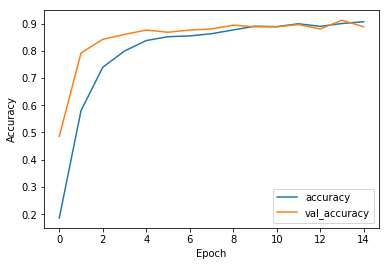

In [12]:
plt.plot(train_log.history['accuracy'], label='accuracy')
plt.plot(train_log.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

print('Training accuracy: %f' % train_log.history['accuracy'][-1])
print('Validation accuracy: %f' % train_log.history['val_accuracy'][-1])

In [13]:
tf_test_data = tf.data.Dataset.from_tensor_slices(([test_data.to_numpy().reshape(len(test_data), 64, 32, 1)]))

predictions = model.predict(tf_test_data)
predictions = np.argmax(predictions, axis=1)


,1 x 1,1 x 2,1 x 3,1 x 4,1 x 5,1 x 6,1 x 7,1 x 8,1 x 9,1 x 10,...,64 x 23,64 x 24,64 x 25,64 x 26,64 x 27,64 x 28,64 x 29,64 x 30,64 x 31,64 x 32
0,0.311378,0.335732,0.382921,0.484067,0.661398,0.997288,1.575493,2.128881,2.213607,1.848157,...,4.646724,2.285296,0.890653,0.299766,0.142841,0.152072,0.172359,0.136462,0.071099,0.028696
1,0.000476,0.003577,0.019321,0.074476,0.216741,0.489835,0.844552,1.069819,0.978936,0.684916,...,0.101132,0.016792,0.001953,0.000134,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.054267,0.054137,0.054194,0.067919,0.126184,0.253441,0.413696,0.509867,0.489658,0.400687,...,0.081991,0.056863,0.035795,0.016355,0.005018,0.001013,0.000133,0.000011,0.000000,0.000000
3,0.550233,0.600577,0.576809,0.457269,0.368221,0.422580,0.605811,0.802380,1.038589,2.068819,...,2.289251,0.777706,0.213504,0.053119,0.020154,0.015835,0.011917,0.006069,0.002001,0.000478
4,0.005757,0.009509,0.016468,0.043071,0.162126,0.512666,1.141945,1.770275,1.990202,1.808615,...,68.959128,35.077658,12.813504,3.593019,0.853461,0.184965,0.035867,0.006348,0.000928,0.000128
5,0.092798,0.110163,0.197869,0.356460,0.484839,0.527195,0.548192,0.551455,0.456084,0.284225,...,32.693030,13.054302,4.399996,1.229605,0.276627,0.049203,0.006553,0.000681,0.000041,0.000003
6,0.023758,0.056636,0.128288,0.243766,0.433520,0.759149,1.199793,1.575282,1.761036,1.950895,...,0.073951,0.048959,0.024819,0.010519,0.005364,0.003253,0.001580,0.000514,0.000109,0.000016
7,0.911246,11.984087,34.948025,63.255407,84.658177,93.716131,94.829028,93.870414,93.267720,93.136353,...,86.726777,86.482432,86.442857,87.100193,87.392191,84.375103,73.945704,54.016442,29.995572,13.587213
8,0.038129,0.035844,0.027610,0.024472,0.062893,0.206857,0.498139,0.839724,1.021456,0.978643,...,24.547027,38.223034,40.407744,28.918687,13.951801,4.521741,0.983333,0.143702,0.013848,0.000451
9,0.009234,0.023250,0.067274,0.201195,0.617511,1.651560,3.325153,4.939495,6.066148,7.686508,...,0.204068,0.052685,0.010648,0.001777,0.000422,0.001437,0.007145,0.023815,0.052815,0.078480


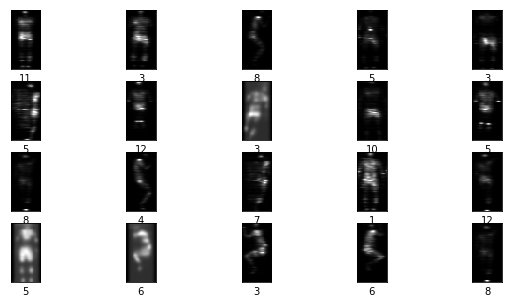

In [18]:
plt.figure(figsize=(10,5))

for i, row in test_data.head(20).reset_index(drop=True).iterrows():
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(row.values.reshape((64, 32)), cmap='gray')
    plt.xlabel(predictions[i])

test_data.head(10).reset_index(drop=True)


In [16]:
result.head(20).reset_index(drop=True)

,64 x 32,Subject,Position
0,0.028696,11,0.0
1,0.000000,3,0.0
2,0.000000,8,1.0
3,0.000478,5,0.0
4,0.000128,3,0.0
5,0.000003,5,1.0
6,0.000016,12,0.0
7,13.587213,7,0.0
8,0.000451,10,0.0
9,0.078480,5,0.0
